In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Participation Block

Write question and answer here from lecure

what is an observation? What is a column? Think of a dataset that you can collect ar UCSD. Put it in form of row and column. What is an output class? Why is something a vector?
*   An **observation** (or row) represents a single data point or instance within a dataset.
*   A **column** represents a specific attribute or variable in a dataset. Each column contains data for that attribute across all observations.

In [113]:
data = {
    'Student ID': ['001', '002', '003', '004'],
    'Name': ['Alex', 'Sam', 'Jordan', 'Taylor'],
    'College': ['Muir', 'Marshall', 'Warren', 'Sixth'],
    'GPA': ['3.6', '3.4', '3.7', '3.9'],
    'Age': ['21', '19', '22', '18'],
    'Major': ['Biology', 'Physics', 'Chemistry', 'Computer Science']
}
print(pd.DataFrame(data))

  Student ID    Name   College  GPA Age             Major
0        001    Alex      Muir  3.6  21           Biology
1        002     Sam  Marshall  3.4  19           Physics
2        003  Jordan    Warren  3.7  22         Chemistry
3        004  Taylor     Sixth  3.9  18  Computer Science


An **output class** is the specific attribute we aim to predict or classify in a dataset, such as "GPA" when predicting academic performance. A **vector** represents data as an ordered list of values, with row vectors representing individual observations and column vectors representing specific attributes across all observations.

In [114]:
import sklearn
sklearn.__version__

'1.5.2'

## [scikit-learn API Docs](https://scikit-learn.org/stable/index.html) <br>[scikit-learn datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [115]:
#California housing
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [116]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [117]:
housing.data.shape

(20640, 8)

In [118]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Participation Block
what features from feature_names, do you expect will have the most impact on your housing values in CA. Explain why?

**Ans:** The features likely to impact California housing values most are Median Income, average number of bedrooms, and location. Higher incomes and more bedrooms often correlate with higher property demand and prices, while location influences value based on proximity to desirable areas like urban centers or the coast.

# [Pandas dataframe API Docs](https://pandas.pydata.org/docs/)

In [119]:
housingdf = pd.DataFrame(housing.data, columns = housing.feature_names)
housingdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [120]:
housingdf = pd.DataFrame(housing.data, columns = ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])
housingdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [121]:
housingdf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [122]:
housingtargetsdf = pd.DataFrame(housing.target ,columns = ['MeanPropertyValx100k'])
housingtargetsdf

,MeanPropertyValx100k
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [123]:
housingtargetsdf.describe()

,MeanPropertyValx100k
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

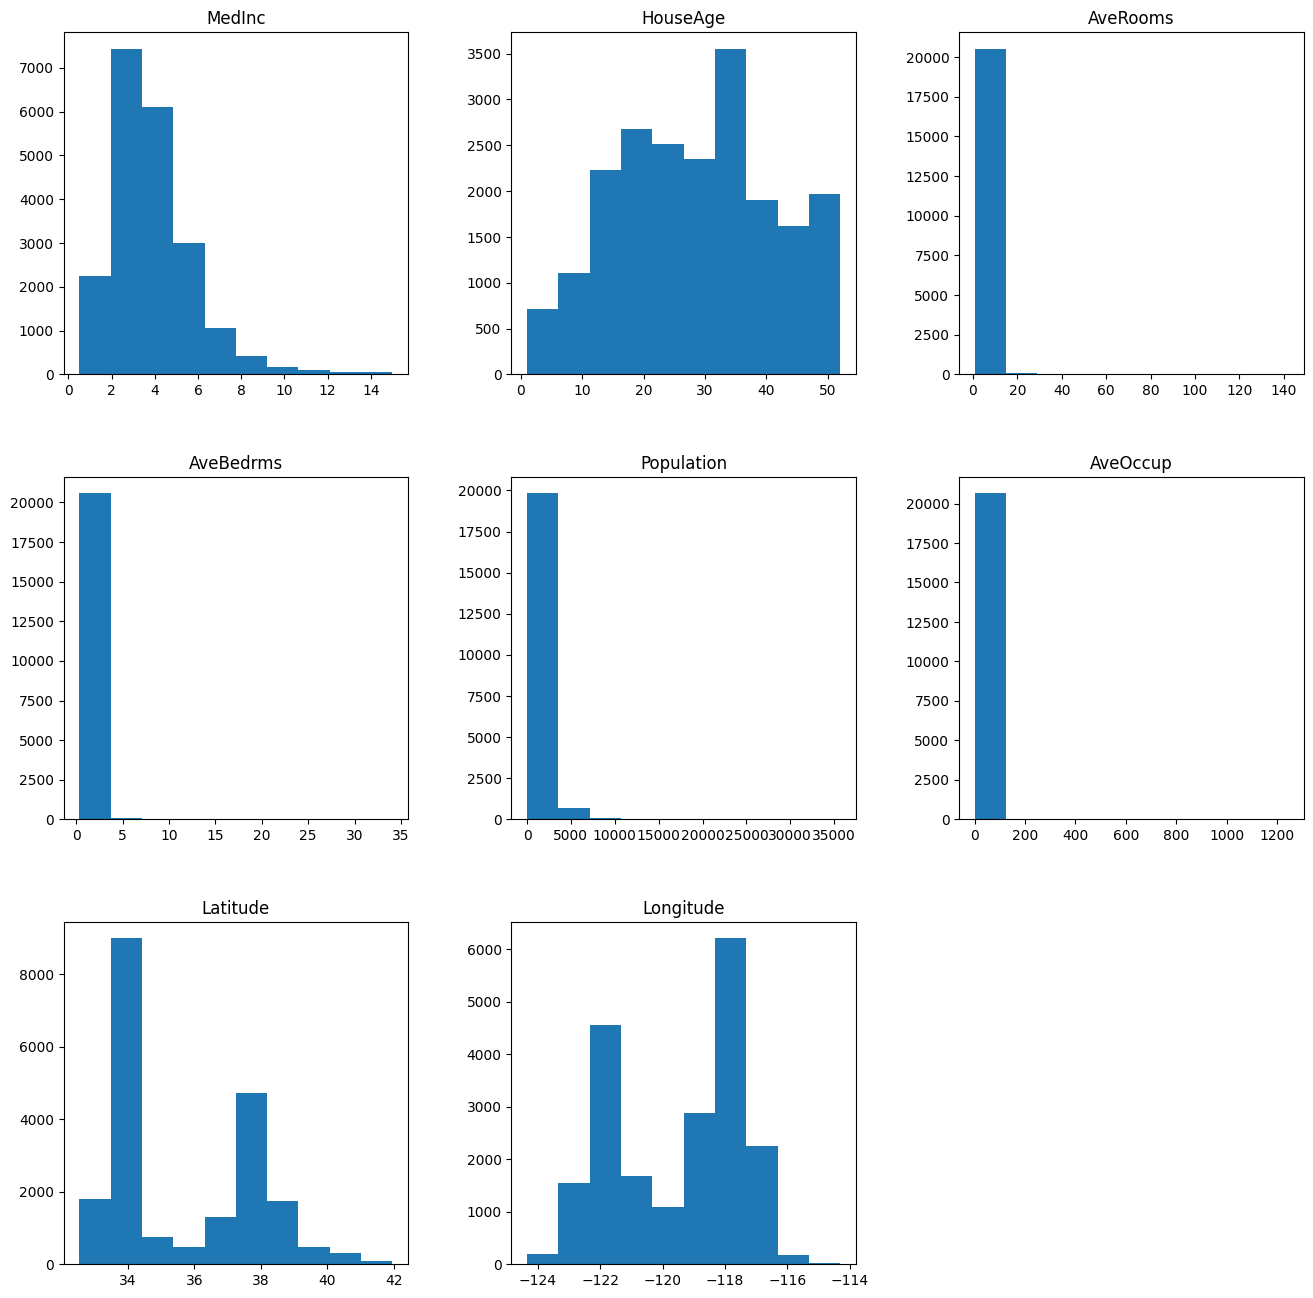

In [124]:
housingdf.hist(figsize = (16, 16), grid = False)

## [Seaborn API Docs](https://seaborn.pydata.org/index.html) <br> [Seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

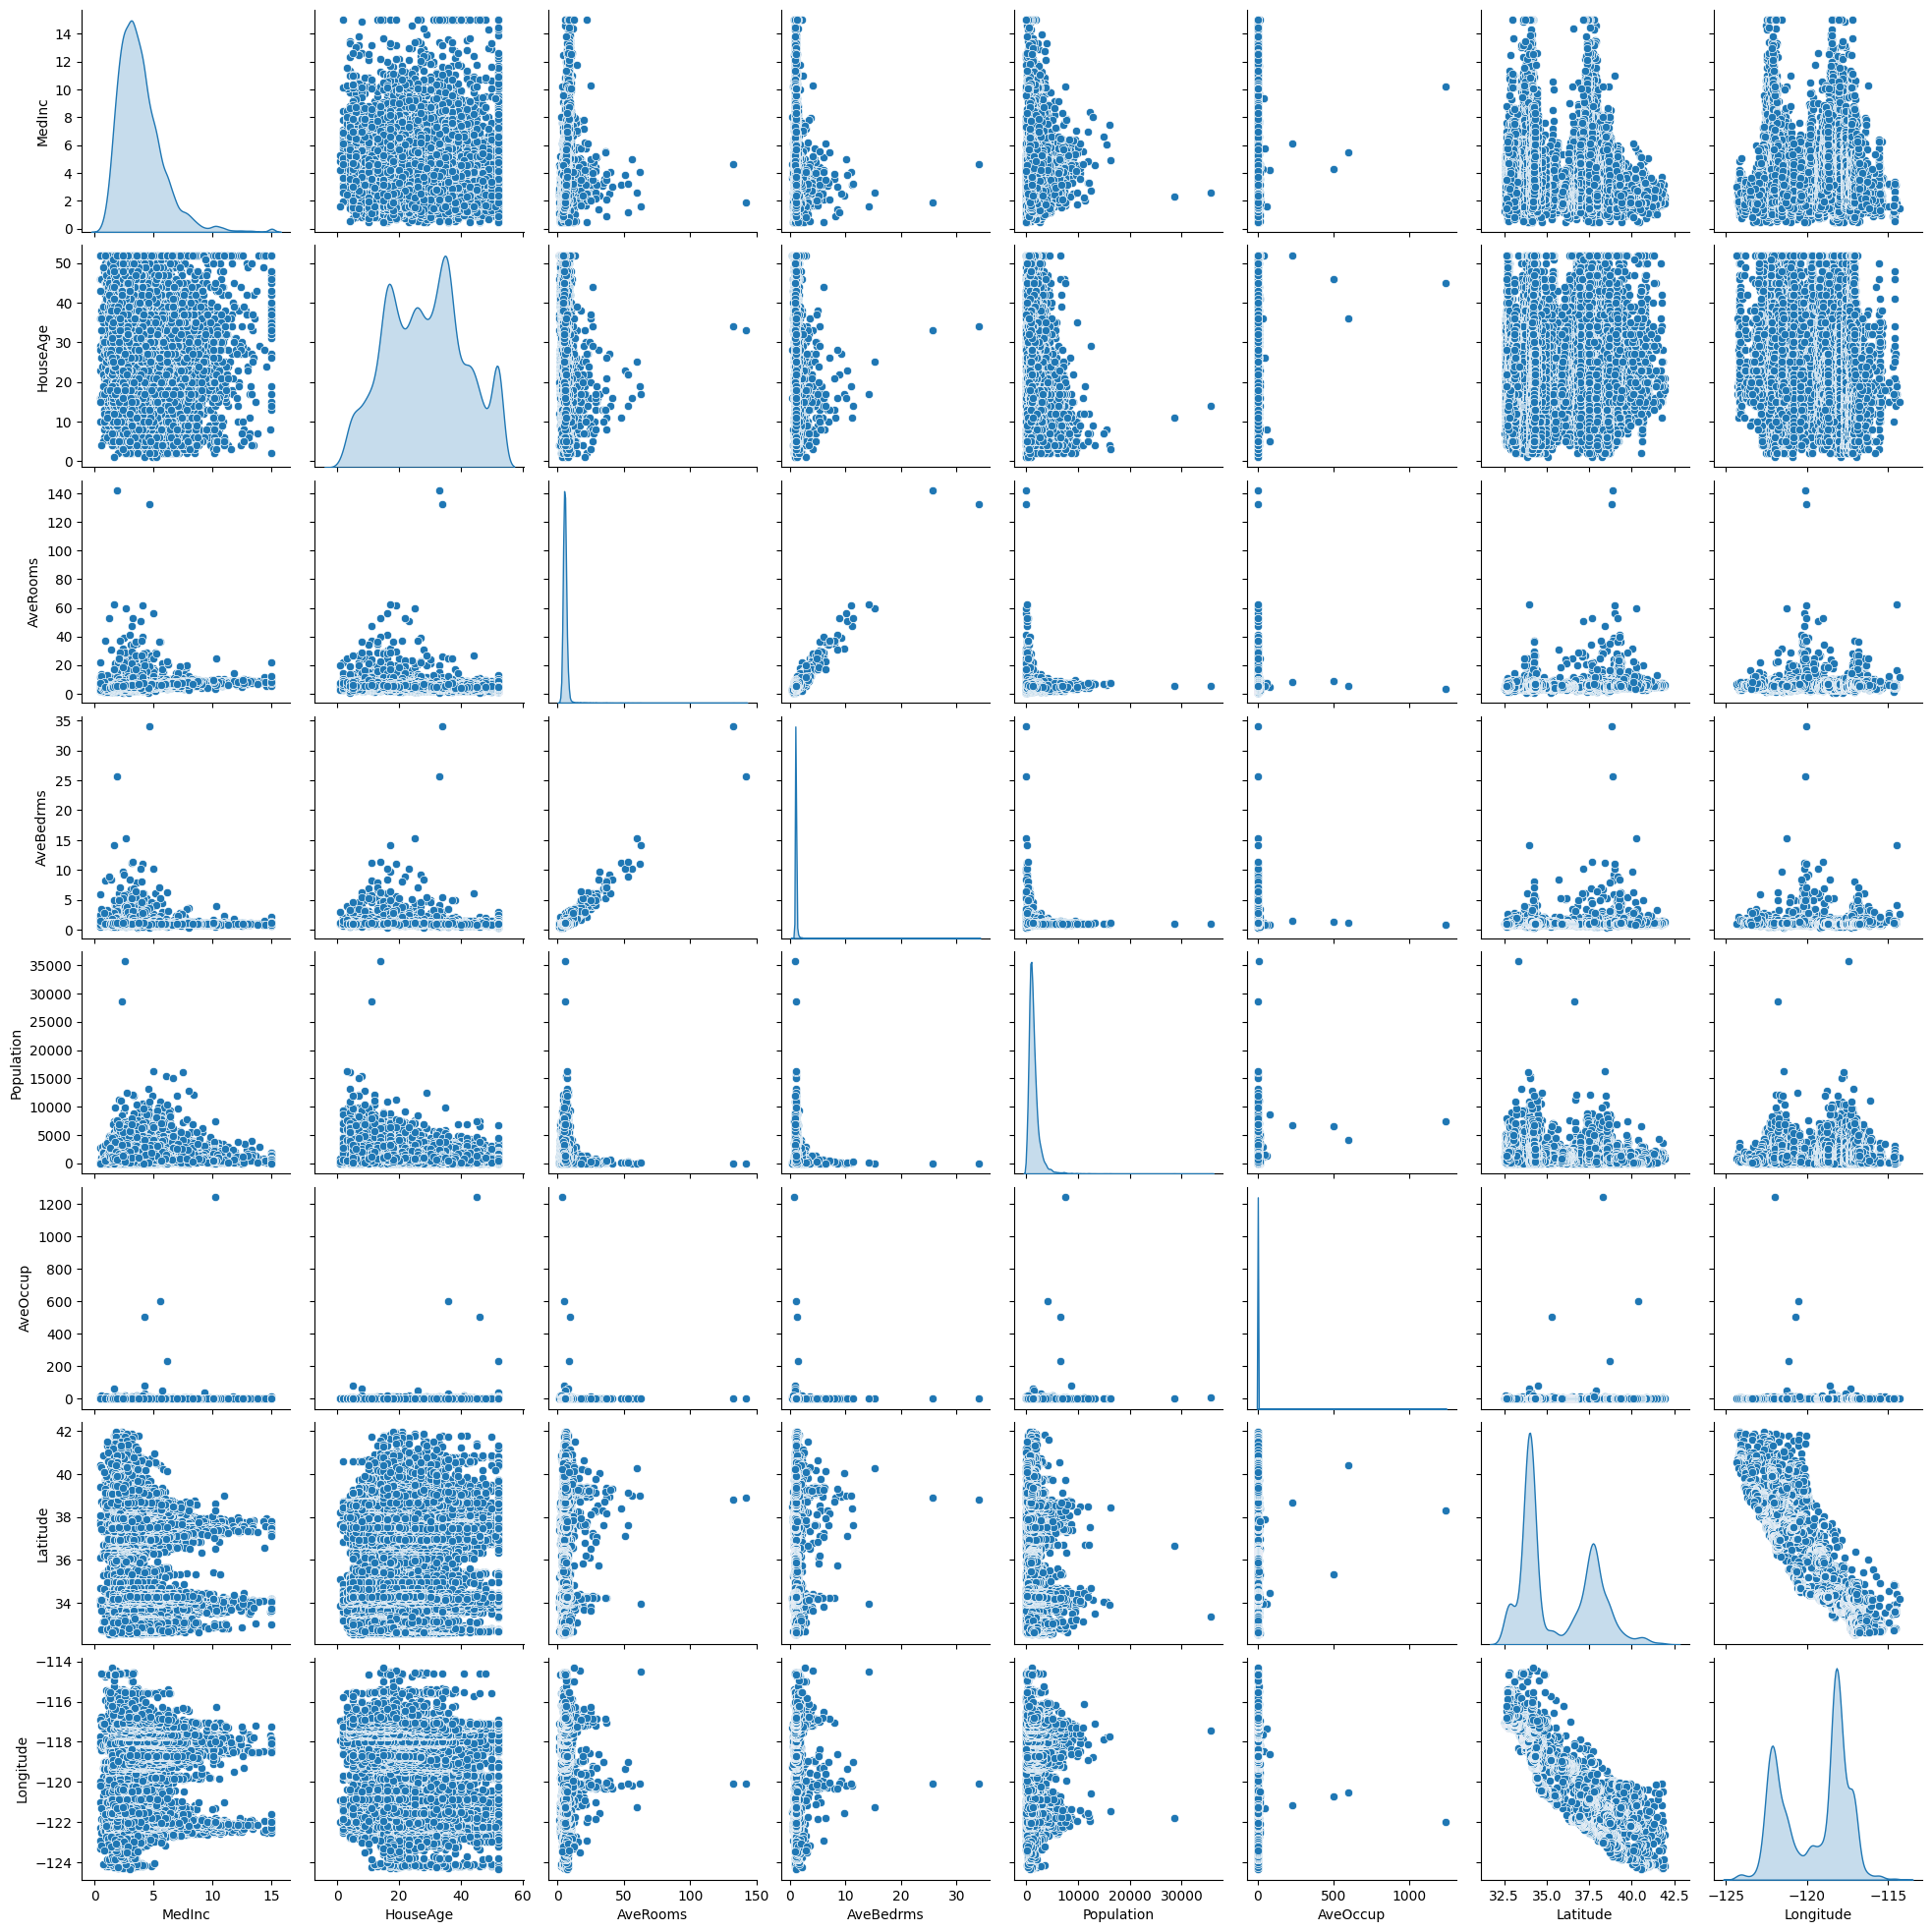

In [125]:
sns.pairplot(housingdf, diag_kind='kde')

In [126]:
tempdf = housingdf.copy()
tempdf['target'] = housingtargetsdf.MeanPropertyValx100k

In [127]:
tempdf.shape

(20640, 9)

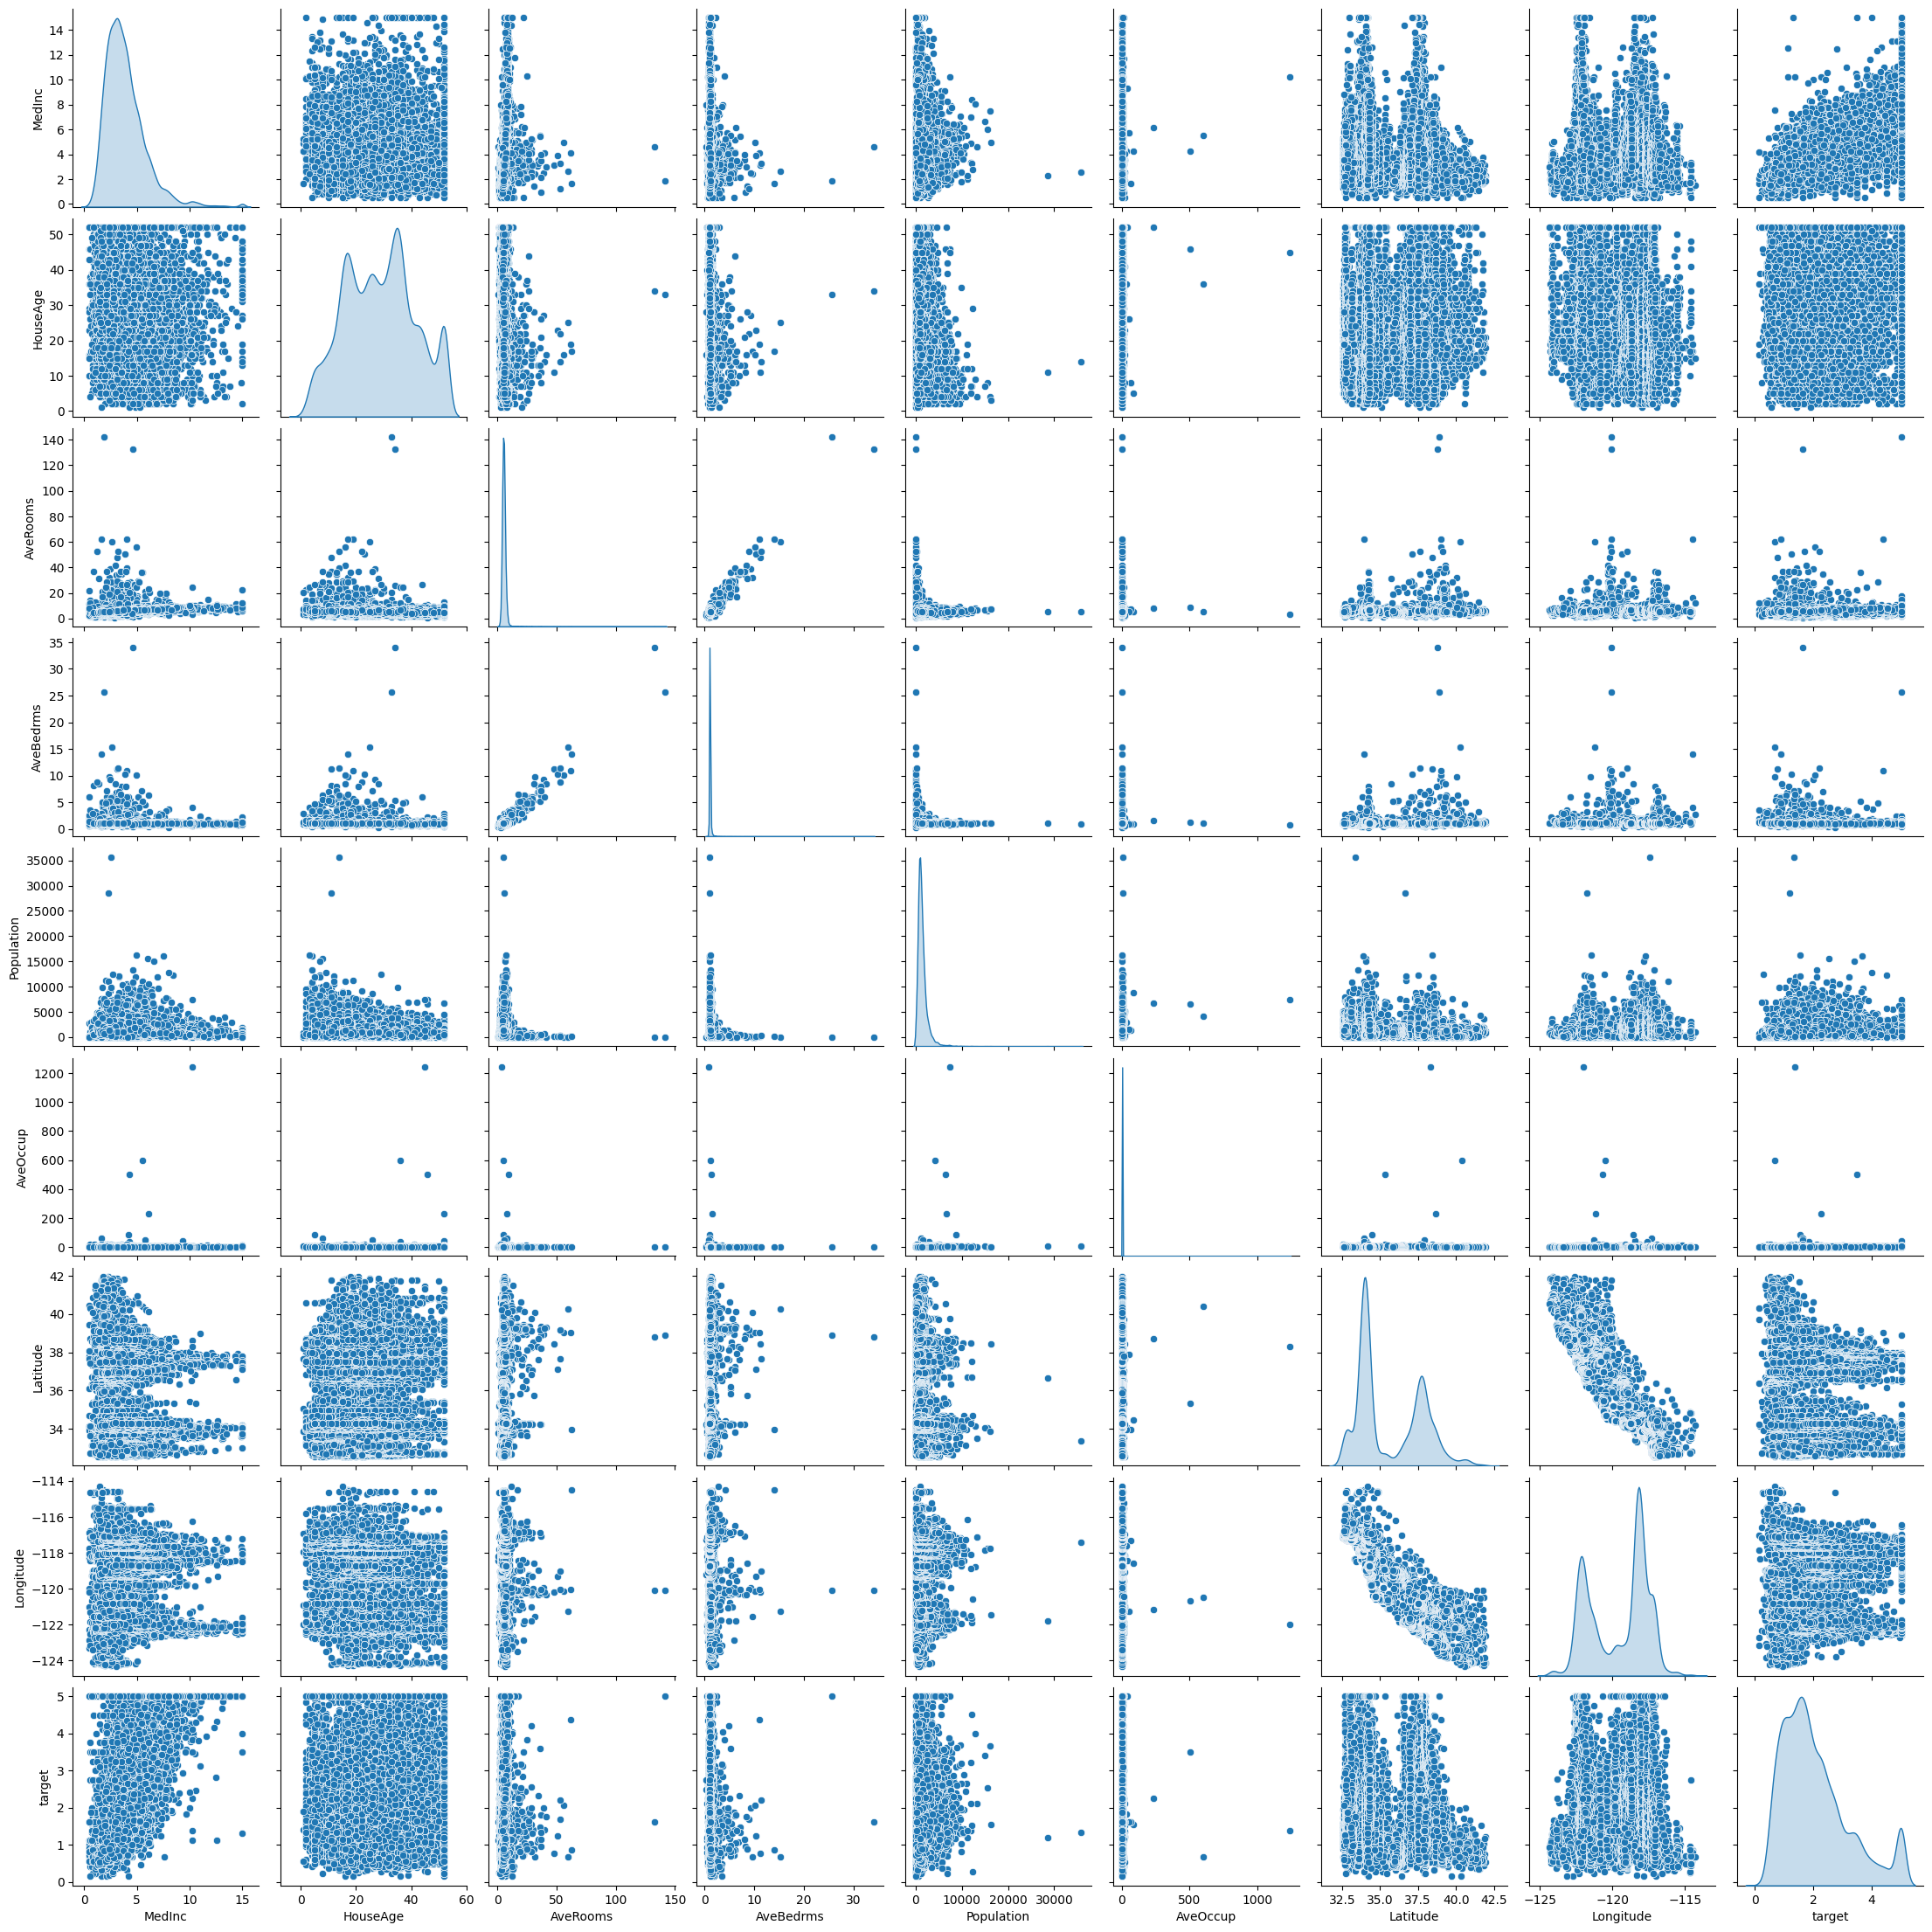

In [128]:
sns.pairplot(tempdf, diag_kind='kde')

In [129]:
corr = tempdf.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<Axes: >

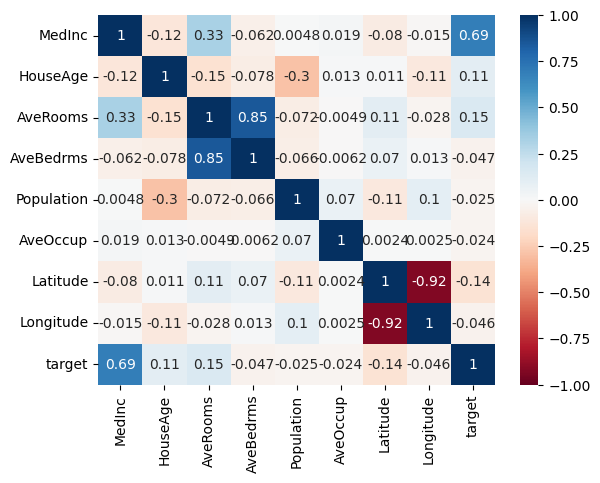

In [130]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [131]:
# housingdf.drop(columns=['AveBedrms']) # dont run this unless you are sure!!!
# housingdf hasn't change, it has no target
tempdf.drop(columns=['AveBedrms'])

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [132]:
# housingdf
tempdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Scikit-learn [linear_models](https://scikit-learn.org/stable/modules/linear_model.html) <br> [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [133]:
from sklearn import linear_model
reg = linear_model.LinearRegression()


In [134]:
model = reg.fit(housingdf['MedInc'].values.reshape(-1,1), housingtargetsdf.MeanPropertyValx100k)

In [135]:
reg.coef_

array([0.41793849])

In [136]:
model = reg.fit(housingdf, housingtargetsdf.MeanPropertyValx100k)

In [137]:
housingdf.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [138]:
model.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

## Seaborn [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

<Axes: xlabel='None'>

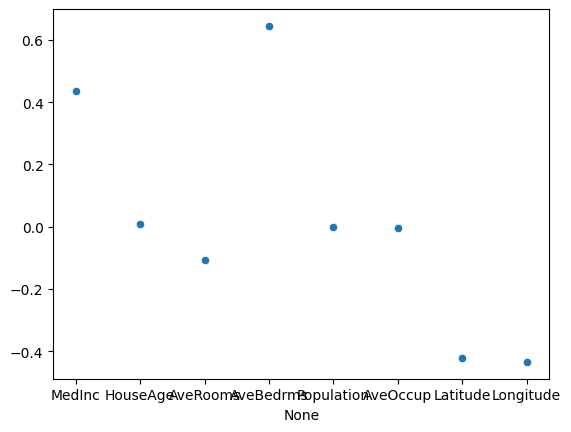

In [139]:
# sns.scatterplot(x = housingdf.drop(labels='target', axis=1).columns, y = model.coef_)
sns.scatterplot(x = tempdf.drop(labels='target', axis=1).columns, y = model.coef_)

<Axes: xlabel='MedInc', ylabel='MeanPropertyValx100k'>

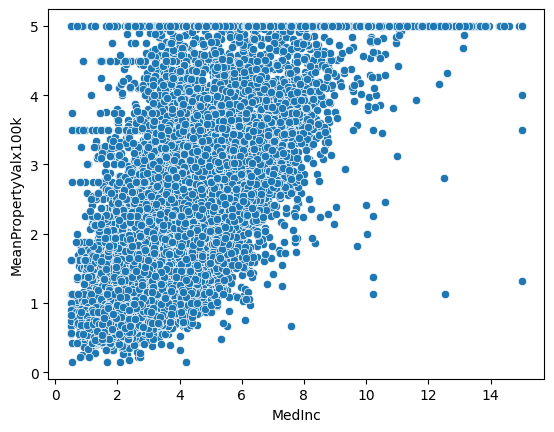

In [140]:
sns.scatterplot(x = housingdf['MedInc'],y = housingtargetsdf.MeanPropertyValx100k)

In [141]:
regAll = linear_model.LinearRegression()
regAll.fit(housingdf, housingtargetsdf.MeanPropertyValx100k)

LinearRegression()

In [142]:
regAll.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [143]:
housingdf.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')